In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [239]:
print(df[df['MasVnrType']=='None'].count()['Id'])
print(df[df['MasVnrType'].isnull()].count()['Id'])
print(df[df['MasVnrArea']==0].count()['Id'])
print(df[df['MasVnrArea'].isnull()].count()['Id'])

864
8
861
8


In [240]:
#removing the misleading value of area 1
df.loc[(df['MasVnrType']=='None') & (df['MasVnrArea']==1),'MasVnrArea']=0

In [241]:
#where area and type both are null, setting them to 0 and none respectively
print(df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea'].isnull()),('MasVnrArea','MasVnrType')])
df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea'].isnull()),('MasVnrArea','MasVnrType')]=0,'None'
df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea'].isnull()),('MasVnrArea','MasVnrType')]

      MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN


,MasVnrArea,MasVnrType


In [242]:
#when area is 0 bt Type is not none, setting type to the mean of area
df.loc[(df['MasVnrType']!='None') & (df['MasVnrArea']==0),('MasVnrArea')]=df[df['MasVnrArea']!=0]['MasVnrArea'].mean()

In [243]:
#when area is not 0 bt Type is none, setting type to the mode of types
print(df.loc[(df['MasVnrType']=='None') & (df['MasVnrArea']!=0),('MasVnrType','MasVnrArea')])
df.loc[(df['MasVnrType']=='None') & (df['MasVnrArea']!=0),('MasVnrType')]=df[df['MasVnrType']!='None']['MasVnrType'].mode().iloc[0]
df.loc[(df['MasVnrType']=='None') & (df['MasVnrArea']!=0),('MasVnrType','MasVnrArea')]

     MasVnrType  MasVnrArea
624        None       288.0
1300       None       344.0
1334       None       312.0


,MasVnrType,MasVnrArea


In [244]:
print(df[df['MasVnrType']=='None'].count()['Id'])
print(df[df['MasVnrType'].isnull()].count()['Id'])
print(df[df['MasVnrArea']==0].count()['Id'])
print(df[df['MasVnrArea'].isnull()].count()['Id'])

869
0
869
0


In [245]:
#where type is null bt area is greater than 0 setting it to mode of types
print(df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea']!=0),'MasVnrType'])
df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea']!=0),'MasVnrType']=df[df['MasVnrType']!='None']['MasVnrType'].mode()
df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea']!=0),'MasVnrType']

Series([], Name: MasVnrType, dtype: object)


Series([], Name: MasVnrType, dtype: object)

In [246]:
print(df['Alley'].unique())
df['Alley']=df['Alley'].fillna('NA')
df['Alley'].unique()

[nan 'Grvl' 'Pave']


array(['NA', 'Grvl', 'Pave'], dtype=object)

In [247]:
print(df['LotFrontage'].unique())
df['LotFrontage']=df['LotFrontage'].fillna(0)
df['LotFrontage'].unique()

[  65.   80.   68.   60.   84.   85.   75.   nan   51.   50.   70.   91.
   72.   66.  101.   57.   44.  110.   98.   47.  108.  112.   74.  115.
   61.   48.   33.   52.  100.   24.   89.   63.   76.   81.   95.   69.
   21.   32.   78.  121.  122.   40.  105.   73.   77.   64.   94.   34.
   90.   55.   88.   82.   71.  120.  107.   92.  134.   62.   86.  141.
   97.   54.   41.   79.  174.   99.   67.   83.   43.  103.   93.   30.
  129.  140.   35.   37.  118.   87.  116.  150.  111.   49.   96.   59.
   36.   56.  102.   58.   38.  109.  130.   53.  137.   45.  106.  104.
   42.   39.  144.  114.  128.  149.  313.  168.  182.  138.  160.  152.
  124.  153.   46.]


array([  65.,   80.,   68.,   60.,   84.,   85.,   75.,    0.,   51.,
         50.,   70.,   91.,   72.,   66.,  101.,   57.,   44.,  110.,
         98.,   47.,  108.,  112.,   74.,  115.,   61.,   48.,   33.,
         52.,  100.,   24.,   89.,   63.,   76.,   81.,   95.,   69.,
         21.,   32.,   78.,  121.,  122.,   40.,  105.,   73.,   77.,
         64.,   94.,   34.,   90.,   55.,   88.,   82.,   71.,  120.,
        107.,   92.,  134.,   62.,   86.,  141.,   97.,   54.,   41.,
         79.,  174.,   99.,   67.,   83.,   43.,  103.,   93.,   30.,
        129.,  140.,   35.,   37.,  118.,   87.,  116.,  150.,  111.,
         49.,   96.,   59.,   36.,   56.,  102.,   58.,   38.,  109.,
        130.,   53.,  137.,   45.,  106.,  104.,   42.,   39.,  144.,
        114.,  128.,  149.,  313.,  168.,  182.,  138.,  160.,  152.,
        124.,  153.,   46.])

In [248]:
print(df['Alley'].unique())
df['Alley']=df['Alley'].fillna('NA')
df['Alley'].unique()

['NA' 'Grvl' 'Pave']


array(['NA', 'Grvl', 'Pave'], dtype=object)

In [249]:
print(df['BsmtQual'].unique())
df['BsmtQual']=df['BsmtQual'].fillna('NA')
df['BsmtQual'].unique()

['Gd' 'TA' 'Ex' nan 'Fa']


array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

In [250]:
print(df['BsmtCond'].unique())
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtCond'].unique()

['TA' 'Gd' nan 'Fa' 'Po']


array(['TA', 'Gd', 'NA', 'Fa', 'Po'], dtype=object)

In [251]:
print(df['BsmtExposure'].unique())
df['BsmtExposure']=df['BsmtExposure'].fillna('NA')
df['BsmtExposure'].unique()

['No' 'Gd' 'Mn' 'Av' nan]


array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

In [252]:
print(df['BsmtFinType1'].unique())
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtFinType1'].unique()

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

In [253]:
print(df['BsmtFinType2'].unique())
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')
df['BsmtFinType2'].unique()

['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [254]:
df['Electrical'].mode().iloc[0]
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode().iloc[0])

In [255]:
print(df['FireplaceQu'].unique())
df['FireplaceQu']=df['FireplaceQu'].fillna('NA')
df['FireplaceQu'].unique()

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [256]:
print(df['GarageType'].unique())
df['GarageType']=df['GarageType'].fillna('NA')
df['GarageType'].unique()

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NA', 'Basment', '2Types'], dtype=object)

In [257]:
#where garage year
print(df['GarageYrBlt'].unique())
#df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['YearRemodAdd'])
df.loc[(df['GarageYrBlt'].isnull()) & (df['GarageType']!='NA'),'GarageYrBlt']=df['YearRemodAdd']
df.loc[(df['GarageYrBlt'].isnull()) & (df['GarageType']=='NA'),'GarageYrBlt']=0
#df['GarageYrBlt'].unique()
df[['YearBuilt','GarageYrBlt','YearRemodAdd']]
df['GarageYrBlt'].unique()

[ 2003.  1976.  2001.  1998.  2000.  1993.  2004.  1973.  1931.  1939.
  1965.  2005.  1962.  2006.  1960.  1991.  1970.  1967.  1958.  1930.
  2002.  1968.  2007.  2008.  1957.  1920.  1966.  1959.  1995.  1954.
  1953.    nan  1983.  1977.  1997.  1985.  1963.  1981.  1964.  1999.
  1935.  1990.  1945.  1987.  1989.  1915.  1956.  1948.  1974.  2009.
  1950.  1961.  1921.  1900.  1979.  1951.  1969.  1936.  1975.  1971.
  1923.  1984.  1926.  1955.  1986.  1988.  1916.  1932.  1972.  1918.
  1980.  1924.  1996.  1940.  1949.  1994.  1910.  1978.  1982.  1992.
  1925.  1941.  2010.  1927.  1947.  1937.  1942.  1938.  1952.  1928.
  1922.  1934.  1906.  1914.  1946.  1908.  1929.  1933.]


array([ 2003.,  1976.,  2001.,  1998.,  2000.,  1993.,  2004.,  1973.,
        1931.,  1939.,  1965.,  2005.,  1962.,  2006.,  1960.,  1991.,
        1970.,  1967.,  1958.,  1930.,  2002.,  1968.,  2007.,  2008.,
        1957.,  1920.,  1966.,  1959.,  1995.,  1954.,  1953.,     0.,
        1983.,  1977.,  1997.,  1985.,  1963.,  1981.,  1964.,  1999.,
        1935.,  1990.,  1945.,  1987.,  1989.,  1915.,  1956.,  1948.,
        1974.,  2009.,  1950.,  1961.,  1921.,  1900.,  1979.,  1951.,
        1969.,  1936.,  1975.,  1971.,  1923.,  1984.,  1926.,  1955.,
        1986.,  1988.,  1916.,  1932.,  1972.,  1918.,  1980.,  1924.,
        1996.,  1940.,  1949.,  1994.,  1910.,  1978.,  1982.,  1992.,
        1925.,  1941.,  2010.,  1927.,  1947.,  1937.,  1942.,  1938.,
        1952.,  1928.,  1922.,  1934.,  1906.,  1914.,  1946.,  1908.,
        1929.,  1933.])

In [258]:
print(df['GarageFinish'].unique())
df['GarageFinish']=df['GarageFinish'].fillna('NA')
df['GarageFinish'].unique()

['RFn' 'Unf' 'Fin' nan]


array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

In [259]:
print(df['GarageQual'].unique())
df['GarageQual']=df['GarageQual'].fillna('NA')
df['GarageQual'].unique()

['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


array(['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'], dtype=object)

In [260]:
print(df['GarageCond'].unique())
df['GarageCond']=df['GarageCond'].fillna('NA')
df['GarageCond'].unique()

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


array(['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex'], dtype=object)

In [261]:

print(df['PoolQC'].unique())
df['PoolQC']=df['PoolQC'].fillna('NA')
df['PoolQC'].unique()

[nan 'Ex' 'Fa' 'Gd']


array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [262]:
print(df['Fence'].unique())
df['Fence']=df['Fence'].fillna('NA')
df['Fence'].unique()

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


array(['NA', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [263]:
print(df['MiscFeature'].unique())
df['MiscFeature']=df['MiscFeature'].fillna('NA')
df['MiscFeature'].unique()

[nan 'Shed' 'Gar2' 'Othr' 'TenC']


array(['NA', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [264]:
df['Garage'] = df.apply(lambda x: np.log(x['GarageCars']*x['GarageArea']+1), axis=1)
df.head()[['Garage','GarageCars','GarageArea']]

,Garage,GarageCars,GarageArea
0,7.000334,2,548
1,6.825460,2,460
2,7.104144,2,608
3,7.563720,3,642
4,7.827640,3,836


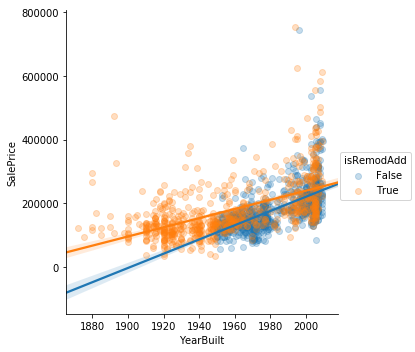

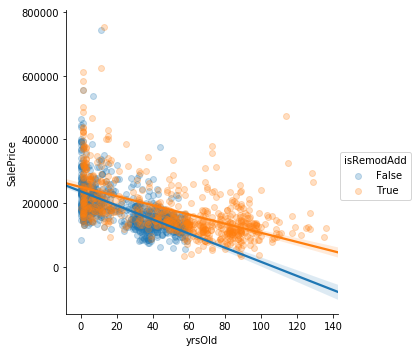

In [354]:
df['isRemodAdd']=df.apply(lambda x: x['YearRemodAdd']>x['YearBuilt'], axis =1)
sns.lmplot(x='YearBuilt',y='SalePrice',data=df, hue = 'isRemodAdd',scatter_kws={'alpha':0.25})
df['yrsOld'] = df.apply(lambda x: x['YrSold']-x['YearBuilt'], axis =1)
sns.lmplot(x='yrsOld',y='SalePrice',data=df, hue = 'isRemodAdd',scatter_kws={'alpha':0.25})
#df.drop('isRemodAdd', inplace=True, axis =1)
#plt.scatter()

In [344]:
SalePrice = df[['Id','SalePrice']]
SalePrice[['Id','SalePrice']].iloc[0]
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [345]:
#column_types = list()
#for x in df.columns:
#    column_types.append((x,type(df[x].iloc[0])))
column_types=[(x,type(df[x].iloc[0])) for x in df.columns]
cat_columns = [x for (x,coltype) in column_types if coltype==str]
numerical_columns = df.columns.difference(cat_columns)
date_columns = ['YearRemodAdd', 'YrSold' , 'YearBuilt', 'MoSold', 'GarageYrBlt']
len(df.columns) - (len(cat_columns)+len(numerical_columns))
numerical_columns.difference(date_columns)
print(['Id','SalePrice'].append(date_columns))
cols_normalize = numerical_columns.difference(date_columns)
cols_normalize

None


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'Garage', 'GarageArea',
       'GarageCars', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'isRemodAdd', 'yrsOld'],
      dtype='object')

In [346]:
from sklearn.preprocessing import Normalizer
normalizer  = Normalizer().fit(df[numerical_columns])
dff_n = df.copy()
dff_n[cols_normalize.difference(['Id','SalePrice'])] = pd.DataFrame(normalizer.transform(df[cols_normalize].drop(['Id','SalePrice'], axis =1)), columns= cols_normalize.difference(['Id','SalePrice']))
#dff_n = pd.concat(dff_n.append(SalePrice)
#dff_n[['Id','SalePrice']].merge(SalePrice)
dff_n[['Id','SalePrice']] = SalePrice
dff_n.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Garage,isRemodAdd,yrsOld
0,1,0.006820,RL,0.007389,0.960520,Pave,NA,Reg,Lvl,AllPub,...,NA,0.0,2,2008,WD,Normal,208500,0.000796,0.000000,0.000568
1,2,0.002017,RL,0.008070,0.968347,Pave,NA,Reg,Lvl,AllPub,...,NA,0.0,5,2007,WD,Normal,181500,0.000688,0.000000,0.003127
2,3,0.005202,RL,0.005896,0.975404,Pave,NA,IR1,Lvl,AllPub,...,NA,0.0,9,2008,WD,Normal,223500,0.000616,0.000087,0.000607
3,4,0.007105,RL,0.006090,0.969357,Pave,NA,IR1,Lvl,AllPub,...,NA,0.0,2,2006,WD,Abnorml,140000,0.000768,0.000102,0.009237
4,5,0.004107,RL,0.005749,0.976037,Pave,NA,IR1,Lvl,AllPub,...,NA,0.0,12,2008,WD,Normal,250000,0.000536,0.000000,0.000548


In [347]:
dff=pd.get_dummies(dff_n)
#dff=dff.copy()


In [348]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dff.drop(['GarageCars','GarageArea', 'Id', 'SalePrice'], axis =1), dff['SalePrice'], test_size=0.3, random_state=101)

In [349]:
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
rf = RandomForestRegressor(random_state=101)
rf.fit(X_train,y_train)
scores =sorted(list(zip(map(lambda x: round(x, 4), rf.feature_importances_),X_train.columns)),reverse=True)
c =Counter([y.partition('_')[0] for (x,y) in scores])
c['Heating']

6

In [350]:
import operator
def getscores(scores):
    score = dict()
    for row in scores:
        name = row[1]
        name = name.partition('_')[0]
        if name in score.keys():
            score[name]=score[name]+row[0]
        else:
            score[name]=row[0]
    
    for k, v in score.items():
        score[k]=score[k]/c[k]
    sorted_x = sorted(score.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_x
x = getscores(scores)            
print(type(x))

<class 'list'>


In [351]:
x

[('yrsOld', 0.31569999999999998),
 ('KitchenAbvGr', 0.048500000000000001),
 ('OverallCond', 0.043799999999999999),
 ('ExterQual', 0.027725),
 ('Fireplaces', 0.0246),
 ('GrLivArea', 0.022100000000000002),
 ('KitchenQual', 0.019924999999999998),
 ('BsmtQual', 0.019779999999999999),
 ('LotArea', 0.0155),
 ('BsmtUnfSF', 0.0143),
 ('BsmtFinSF1', 0.0106),
 ('MSSubClass', 0.0097000000000000003),
 ('MasVnrArea', 0.0094999999999999998),
 ('YearRemodAdd', 0.0066),
 ('2ndFlrSF', 0.0063),
 ('OverallQual', 0.0061999999999999998),
 ('MoSold', 0.0057999999999999996),
 ('LotFrontage', 0.0057000000000000002),
 ('OpenPorchSF', 0.0054999999999999997),
 ('YearBuilt', 0.0048999999999999998),
 ('1stFlrSF', 0.0047000000000000002),
 ('WoodDeckSF', 0.0047000000000000002),
 ('BedroomAbvGr', 0.0044000000000000003),
 ('GarageYrBlt', 0.0040000000000000001),
 ('Garage', 0.0037000000000000002),
 ('FireplaceQu', 0.0036166666666666669),
 ('FullBath', 0.0035999999999999999),
 ('HalfBath', 0.0032000000000000002),
 ('Tot

In [352]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt
pred = rf.predict(X_test)
rmse = sqrt(mean_squared_log_error(y_test, pred))
rmse

0.1950147034397696

In [192]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
selectkbest = SelectKBest(score_func=f_regression, k='all')
fit = selectkbest.fit(X_train, y_train)
scores_kbest =sorted(list(zip(map(lambda x: round(x, 4), fit.scores_),X_train.columns)),reverse=True)
scores_kbest_n = getscores(scores_kbest)
scores_kbest_n

c:\users\ankur.sethi\appdata\local\programs\python\python35\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
c:\users\ankur.sethi\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\ankur.sethi\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\ankur.sethi\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[('ExterQual', 287.896725),
 ('KitchenAbvGr', 229.26089999999999),
 ('YrSold', 215.30760000000001),
 ('YearRemodAdd', 199.33690000000001),
 ('BsmtQual', 173.85156000000001),
 ('GarageFinish', 146.59255000000002),
 ('Foundation', 95.922900000000013),
 ('MasVnrType', 85.58527500000001),
 ('TotalBsmtSF', 51.180999999999997),
 ('MoSold', 50.912199999999999),
 ('Exterior1st', nan),
 ('MasVnrArea', 100.1459),
 ('BedroomAbvGr', 83.826899999999995),
 ('RoofMatl', nan),
 ('FireplaceQu', 86.514416666666648),
 ('OpenPorchSF', 62.488100000000003),
 ('CentralAir', 52.737499999999997),
 ('LotShape', 38.923875000000002),
 ('GarageYrBlt', 36.700200000000002),
 ('SaleCondition', 31.486466666666661),
 ('Neighborhood', 27.052187999999997),
 ('SaleType', 25.857144444444444),
 ('GarageQual', 23.27003333333333),
 ('2ndFlrSF', 15.8637),
 ('HouseStyle', 14.8353625),
 ('1stFlrSF', 14.596500000000001),
 ('HalfBath', 13.2752),
 ('TotRmsAbvGrd', 10.6624),
 ('BldgType', 10.066799999999999),
 ('PoolArea', 7.9356999

In [197]:
#sns.heatmap([['YearBuilt','YrSold']])


KeyError: ('YearBuilt', 'YearRemodAdd')

In [126]:
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)